# **LC Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

lc_dataset_path = '../../datasets/LendingClub/2007-2020Q3/Loan_status_2007-2020Q3.csv'
lc_prep_dataset_path = '../../datasets/preprocessed/lc/'

(CVXPY) Mar 02 10:14:14 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Mar 02 10:14:14 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(lc_prep_dataset_path)

In [3]:
data = utilities.read_csv(lc_dataset_path)
data

/home/debian/DevOps/credit-scoring/src/utilities.py:20: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(dataset_path, dtype=dtype)


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925489,105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925490,105448,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925491,105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 142 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    Unnamed: 0                                  int64  
 1    id                                          object 
 2    loan_amnt                                   float64
 3    funded_amnt                                 float64
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    object 
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

#### Fix column names formatting.

In [5]:
data.columns = data.columns.str.replace("_", "-")

#### Convert `int64` to `float94`.

In [6]:
utilities.int64_to_float64(data)

#### Plot features data types.

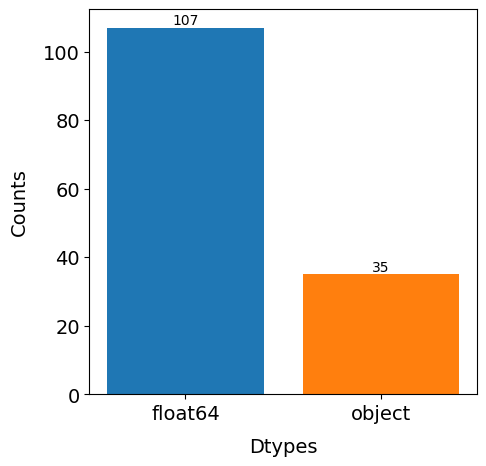

In [7]:
plotting.plot_dtypes_hist(data, '', 'Dtypes', 'Counts',
                          save_path=lc_prep_dataset_path + 'dtypes.pdf')

#### Data cleaning.

In [8]:
before_data_cleaning_count = len(data)

#### Create `defaulted` feature from `loan_status` feature values.

In [9]:
data['loan-status'].value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan-status, dtype: int64

In [10]:
import numpy as np

data.defaulted = np.nan
data.loc[data['loan-status'].isin(['Fully Paid']), 'defaulted'] = False
data.loc[data['loan-status'].isin(['Charged Off', 'Default']), 'defaulted'] = True
data = data[data['defaulted'].isin([True, False])]

data['defaulted'].value_counts()

False    1497783
True      362981
Name: defaulted, dtype: int64

#### Plot class distribution.

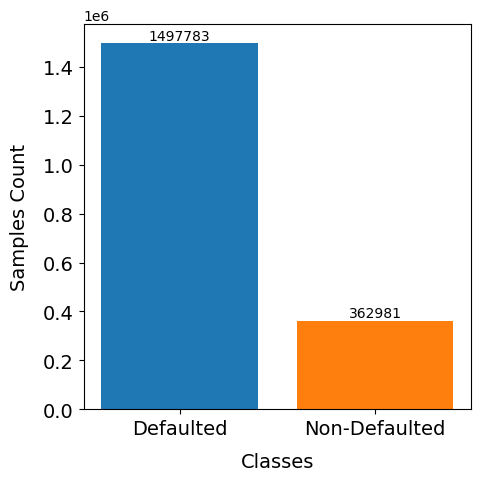

In [11]:
plotting.plot_hist(['Defaulted', 'Non-Defaulted'], data.defaulted.value_counts().values,
                   '', 'Classes', 'Samples Count',
                   save_path=lc_prep_dataset_path + 'class_distribution.pdf')

#### Drop useless and ambiguous features and all features not known to investors ex ante.

In [13]:
data.drop(['Unnamed: 0', 'id', 'il-util', 'max-bal-bc', 'recoveries', 'total-rec-prncp', 'total-rec-int', 'loan-status', 'last-pymnt-d', 'last-pymnt-amnt', 'last-credit-pull-d', 'emp-title'], axis=1, inplace=True)

/tmp/ipykernel_144798/2356424391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Unnamed: 0', 'id', 'il-util', 'max-bal-bc', 'recoveries', 'total-rec-prncp', 'total-rec-int', 'loan-status', 'last-pymnt-d', 'last-pymnt-amnt', 'last-credit-pull-d', 'emp-title'], axis=1, inplace=True)


#### Drop redundant features using IV score.
#### This was computed previously but getting rid of them a-priori helps next pre-processing steps.

In [12]:
data.drop([''], axis=1, inplace=True)

#### Handle special missing values.

In [17]:
utilities.replace_to_nan(data, "unknown")

/home/debian/DevOps/credit-scoring/src/utilities.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(word, np.nan, inplace=True)


#### Plot missing values histogram.

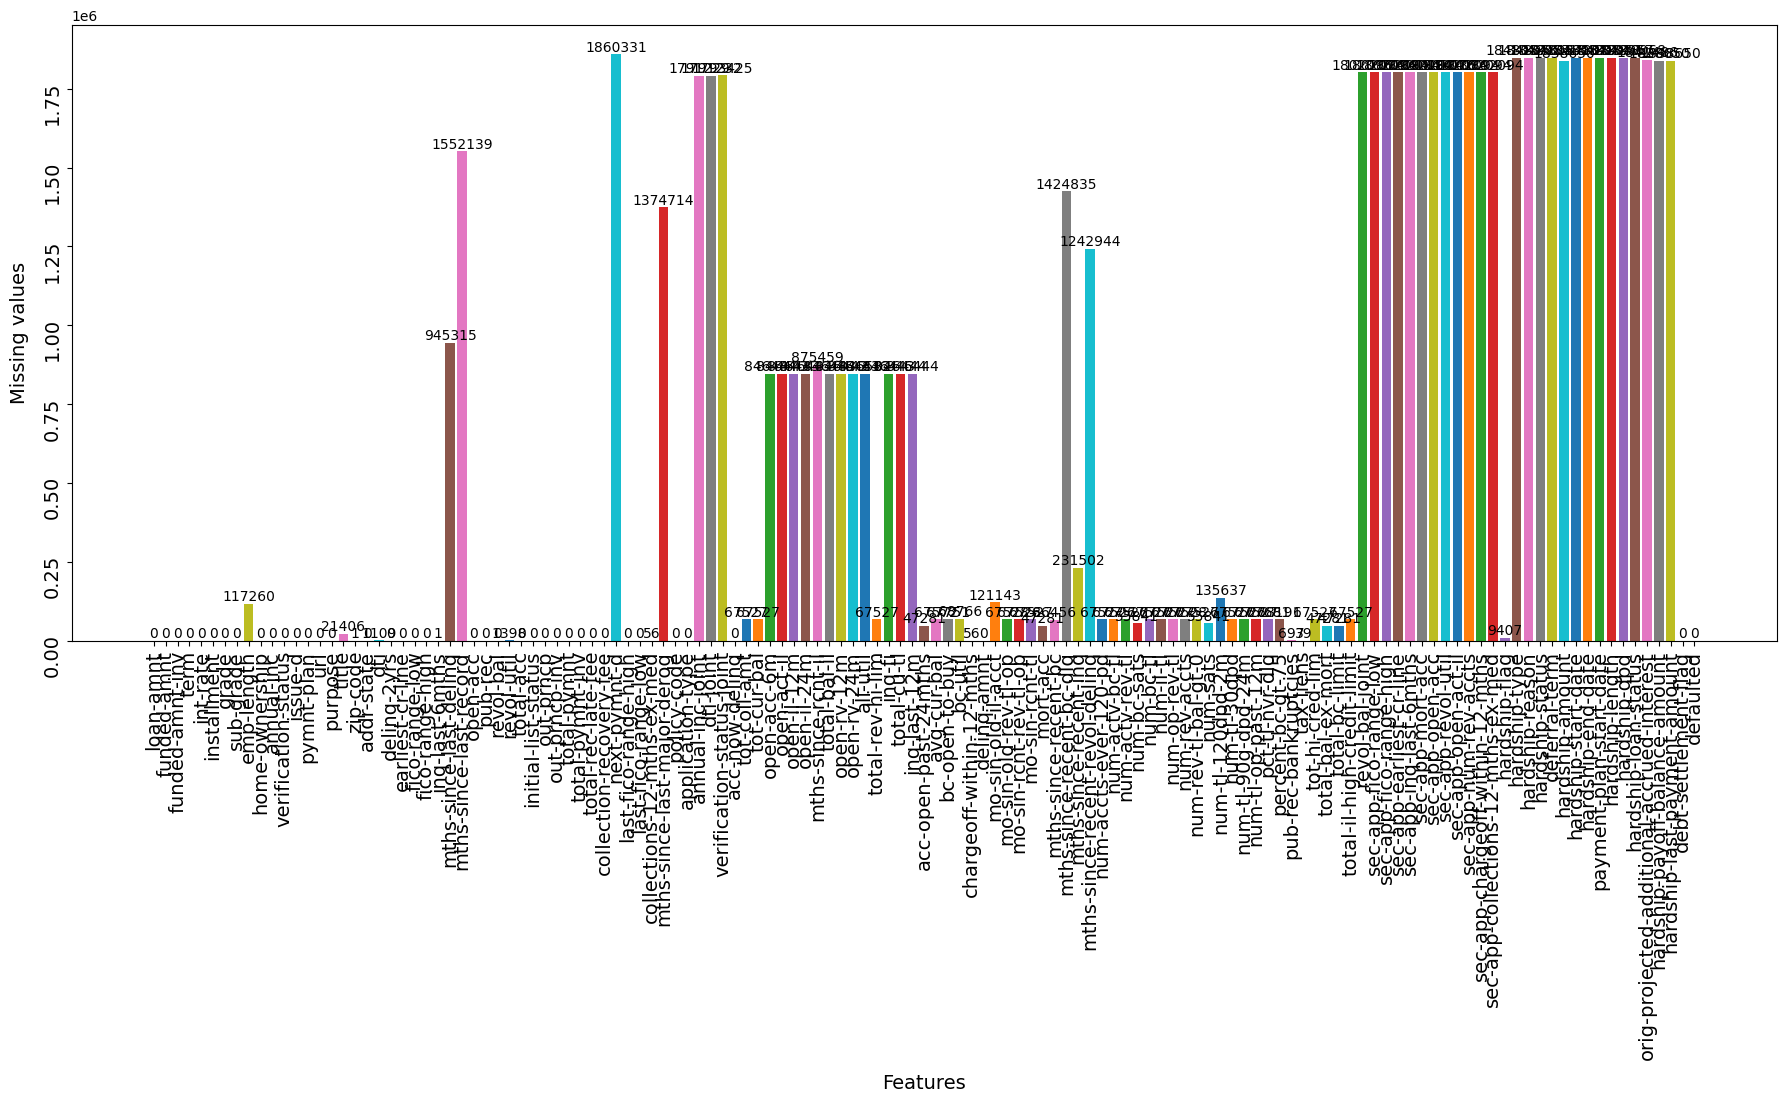

In [ ]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(12,8),
                   rotated_ticks=True, save_path=lc_prep_dataset_path + 'missing_values-1.pdf')

#### Fix features for which binning returns (-inf, inf).

In [18]:
data['email-provided'] = data['email-provided'].astype('category')
data['perm-work-addr-match'] = data['perm-work-addr-match'].astype('category')
data['perm-cont-city-match'] = data['perm-cont-city-match'].astype('category')
data['perm-work-city-match'] = data['perm-work-city-match'].astype('category')
data['doc-6-provided'] = data['doc-6-provided'].astype('category')

#### Apply optimal binninf and WoE.

In [18]:
data, features_scores = preprocessing.opt_bin_woe(data=data, solver="cp",
                                                  outlier_detector="range",
                                                  save_path=lc_prep_dataset_path,
                                                  verbose=False)

  0%|                                                                                                                                                                | 0/131 [00:00<?, ?it/s]


ValueError: Unknown label type: 'unknown'

In [20]:
data

,defaulted,credit-type,gender,owns-car,owns-real-estate,cnt-children,income-amount,credit-amount,annuity-amount,goods-amount,...,ext-source-score-1,ext-source-score-2,ext-source-score-3,building-rating-8,social-dpd-30,social-dpd-30-defaulted,days-phone-changed,doc-3-provided,doc-6-provided,year-credit-bureau-inqs
0,True,-0.036236,-0.250931,-0.056242,0.015093,0.045934,0.022986,-0.388537,-0.115170,-0.143958,...,-0.721189,-0.384543,-1.176614,-0.081602,-0.030141,-0.002224,0.133897,-0.099767,-0.032188,0.102098
1,False,-0.036236,0.154307,-0.056242,-0.033490,0.045934,0.220444,0.425256,-0.041960,0.295792,...,-0.155311,0.371476,0.000000,0.308640,0.004764,-0.002224,-0.040824,-0.099767,-0.032188,0.131724
2,False,0.415543,-0.250931,0.117353,0.015093,0.045934,0.050490,0.327368,0.195039,-0.143958,...,0.000000,0.190548,0.913839,0.000000,0.016206,-0.002224,-0.040824,0.287143,-0.032188,0.131724
3,False,-0.036236,0.154307,-0.056242,0.015093,0.045934,-0.045439,-0.166937,-0.115170,-0.143958,...,0.000000,0.425190,0.000000,0.000000,-0.030141,-0.002224,-0.140862,-0.099767,-0.032188,0.000000
4,False,-0.036236,-0.250931,-0.056242,0.015093,0.045934,-0.079052,-0.207574,-0.070074,0.074176,...,0.000000,-0.384543,0.000000,0.000000,0.016206,-0.002224,0.015677,0.287143,-0.032188,0.131724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,-0.036236,-0.250931,-0.056242,-0.033490,0.045934,-0.045439,0.060453,-0.115170,-0.143958,...,-0.721189,0.630759,0.000000,0.460931,0.016206,-0.002224,-0.191406,0.287143,-0.032188,0.000000
307507,False,-0.036236,0.154307,-0.056242,0.015093,0.045934,0.050490,0.060453,0.195039,-0.143958,...,0.000000,-1.169118,0.000000,-0.081602,0.016206,-0.002224,-0.191406,-0.099767,-0.032188,0.000000
307508,False,-0.036236,0.154307,-0.056242,0.015093,0.045934,-0.045439,0.081030,-0.354649,0.074176,...,1.016443,0.050367,-0.629744,0.135167,-0.080059,-0.002224,0.291179,-0.099767,-0.032188,0.102098
307509,True,-0.036236,0.154307,-0.056242,0.015093,0.045934,-0.024923,-0.222612,-0.070074,-0.143958,...,0.000000,0.050367,0.691855,-0.081602,0.016206,-0.002224,-0.191406,-0.099767,-0.032188,0.131724


#### All missing values handled.

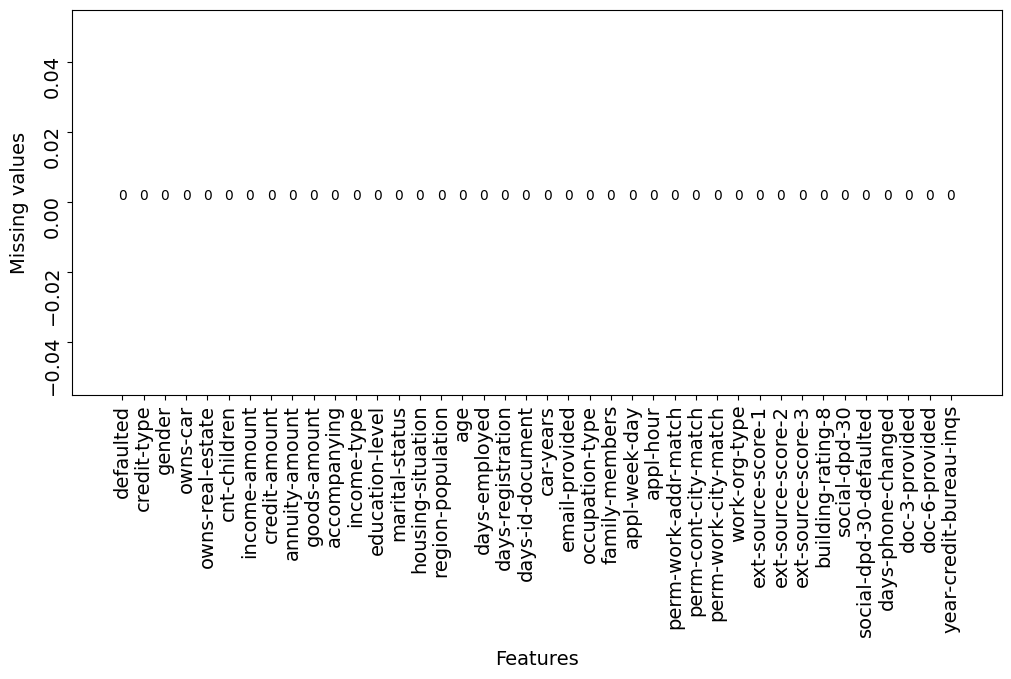

In [21]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(12,5),
                   rotated_ticks=True, save_path=lc_prep_dataset_path + 'missing_values-2.pdf')

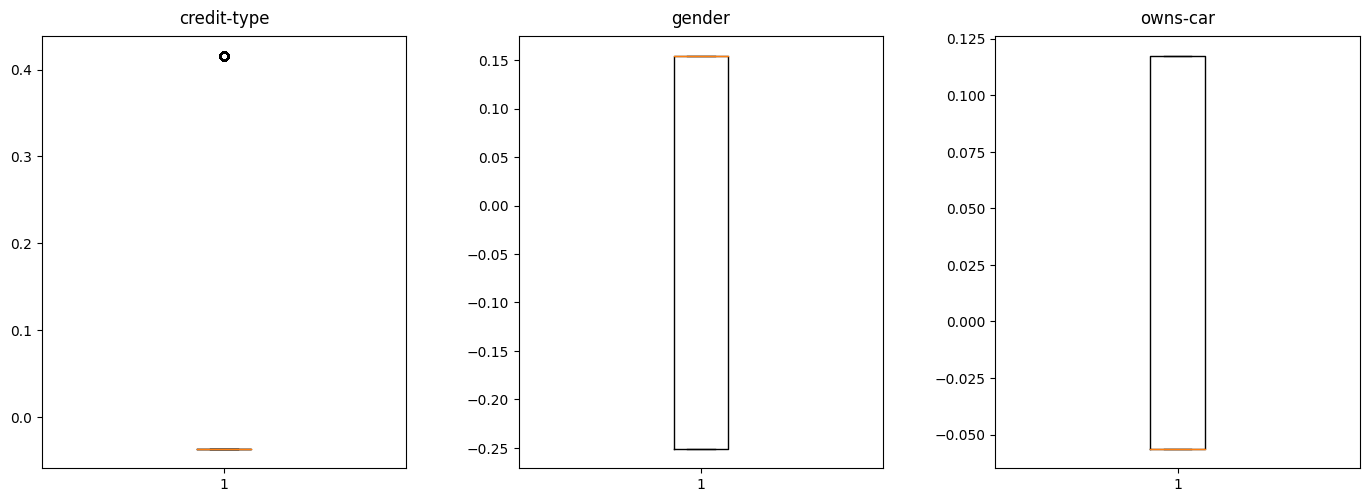

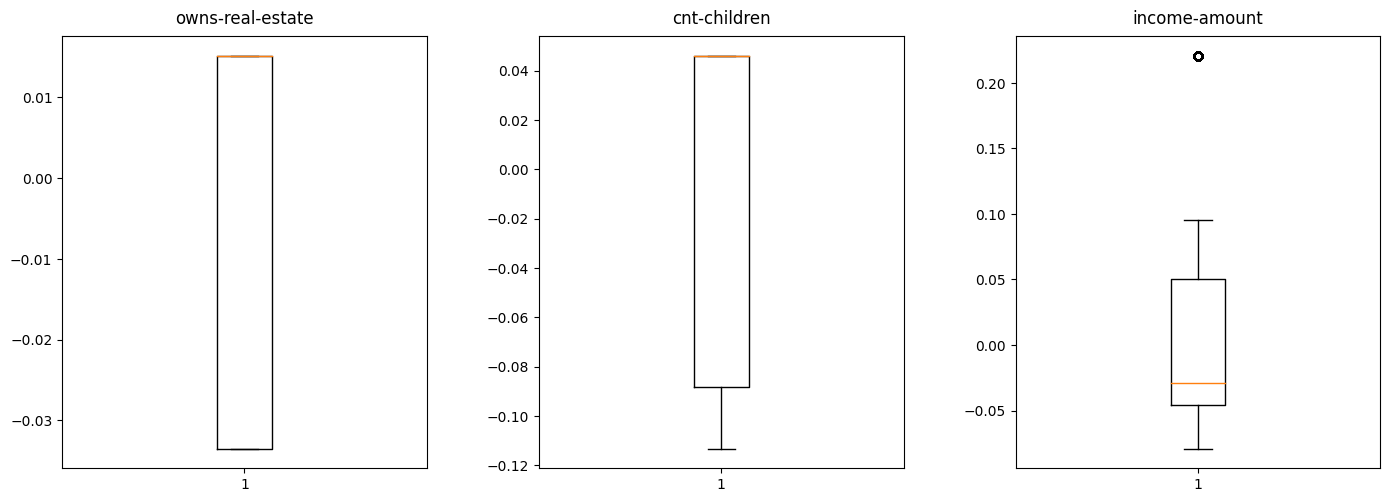

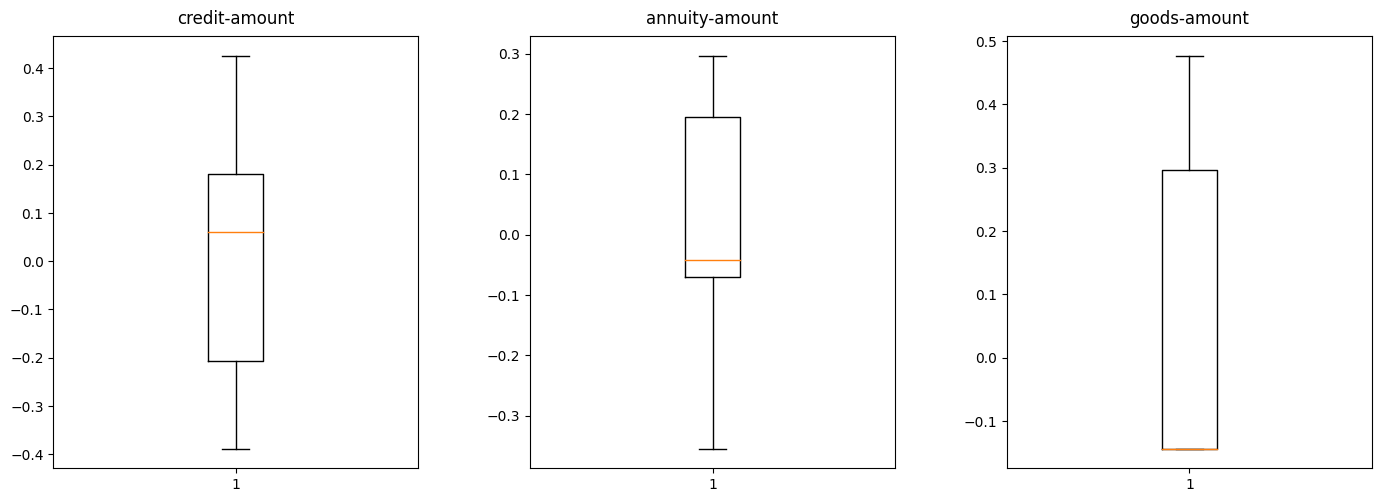

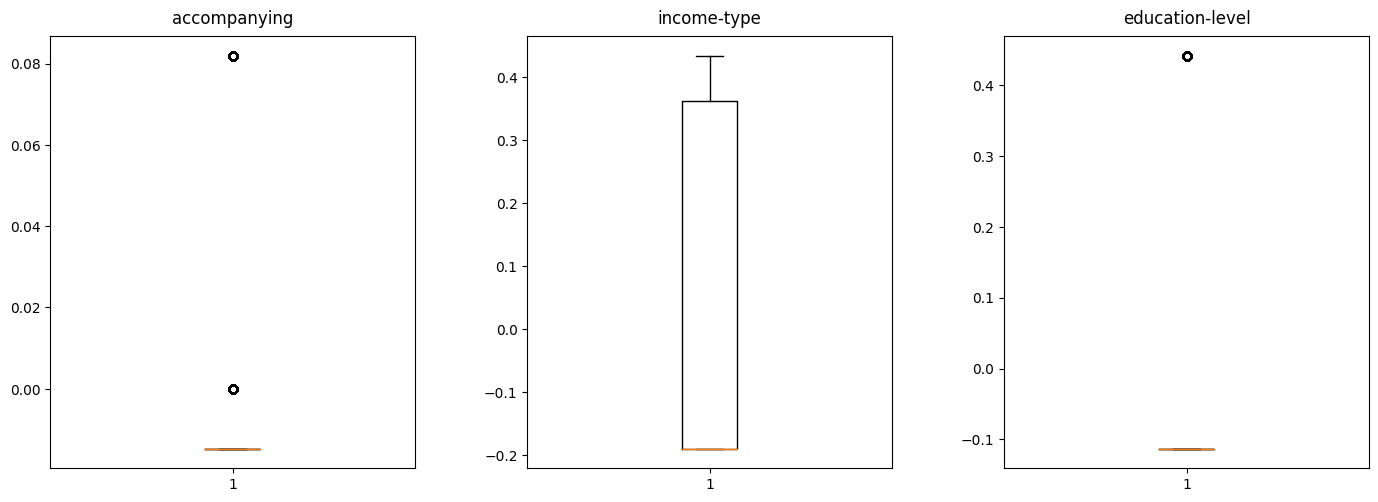

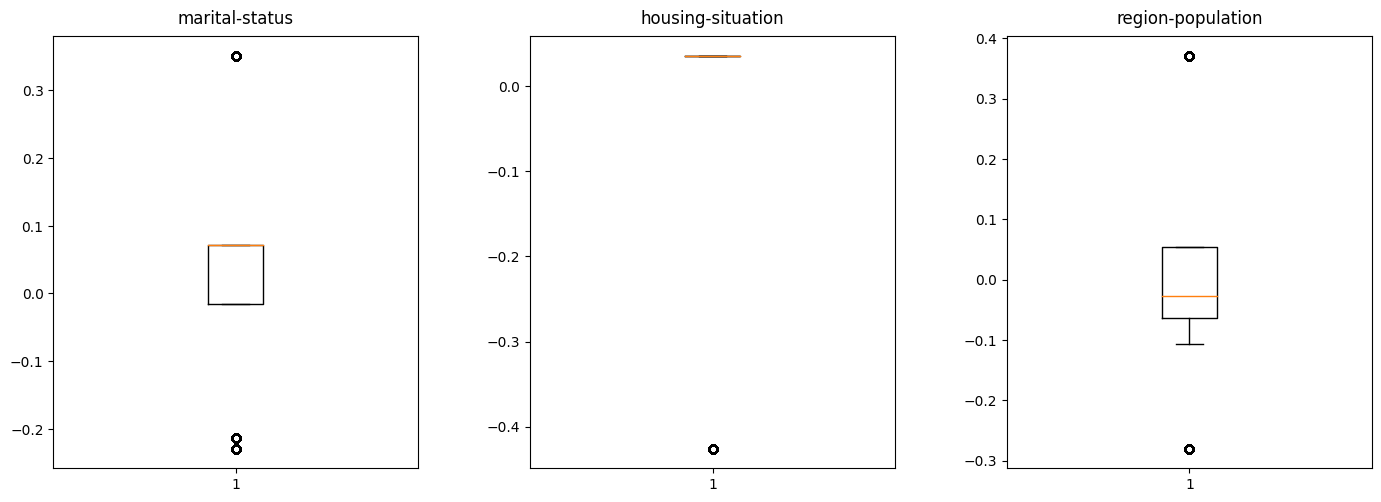

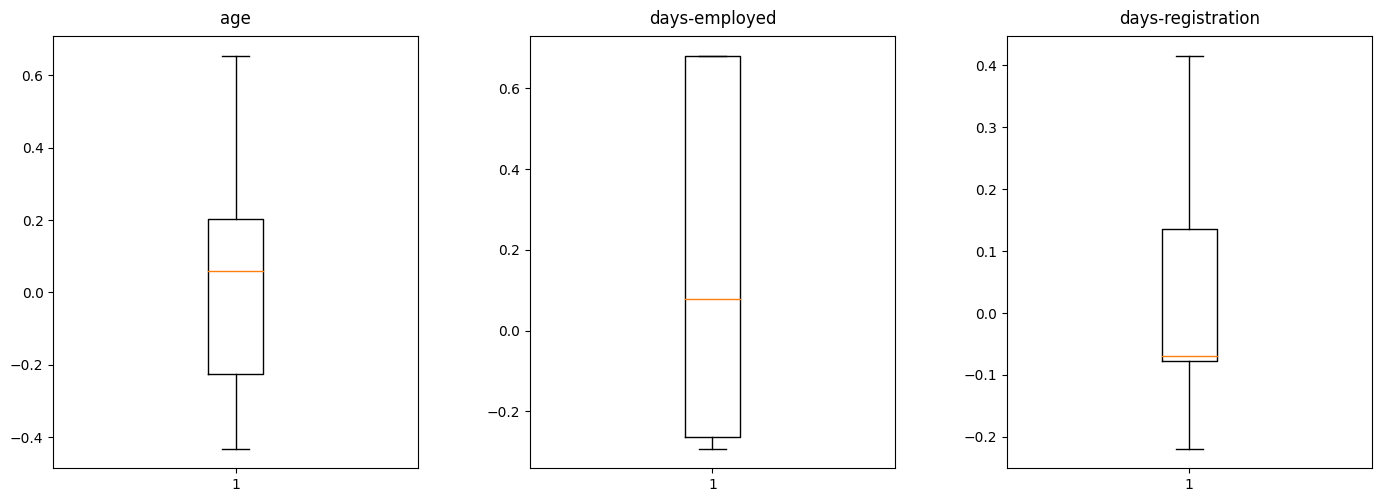

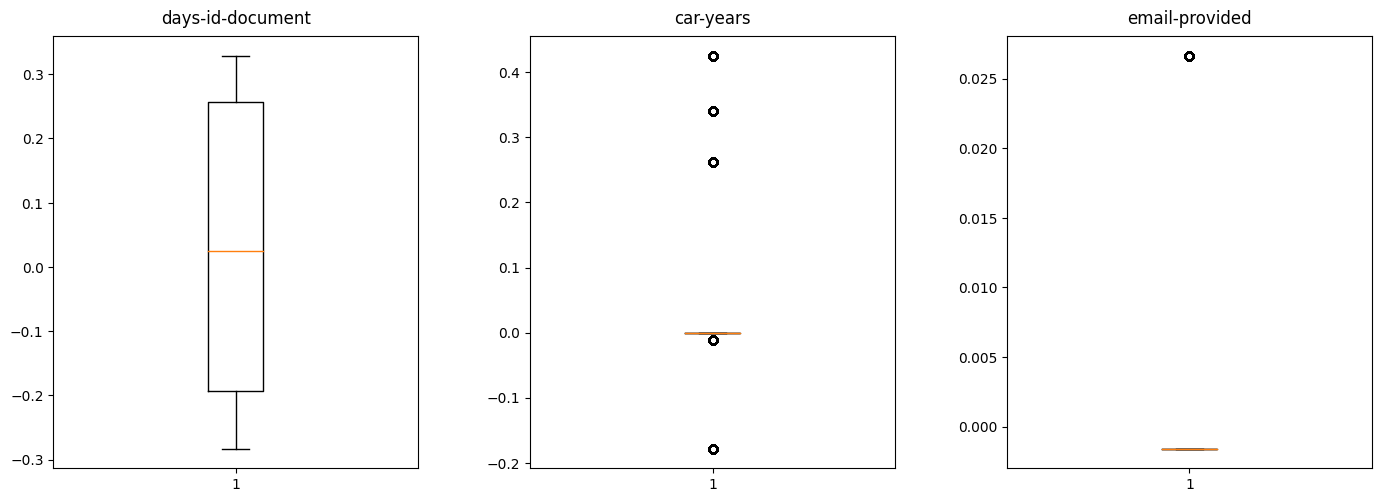

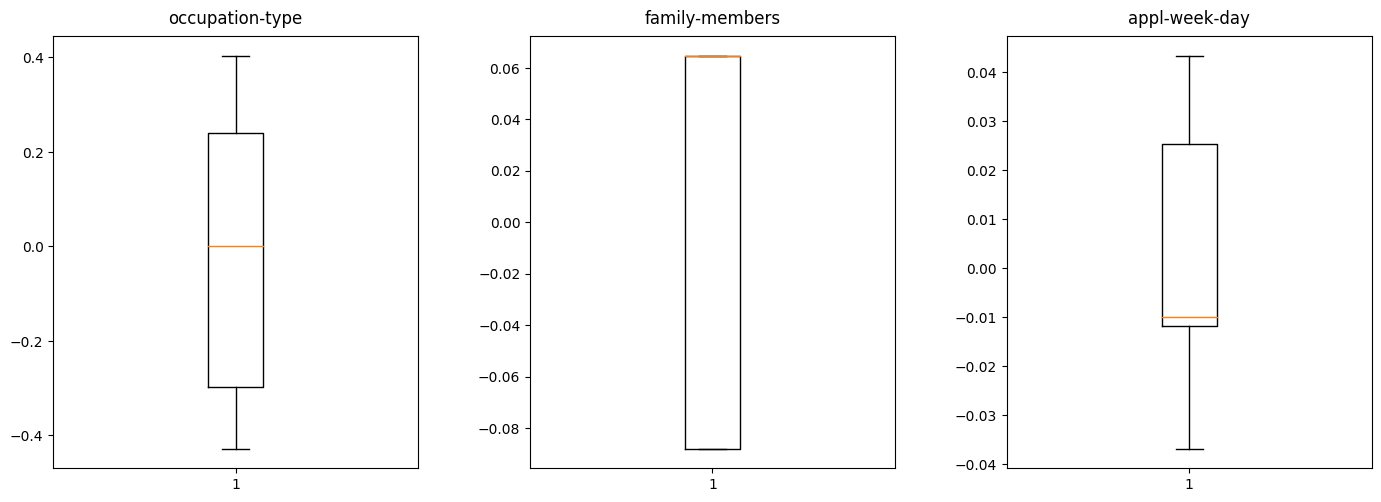

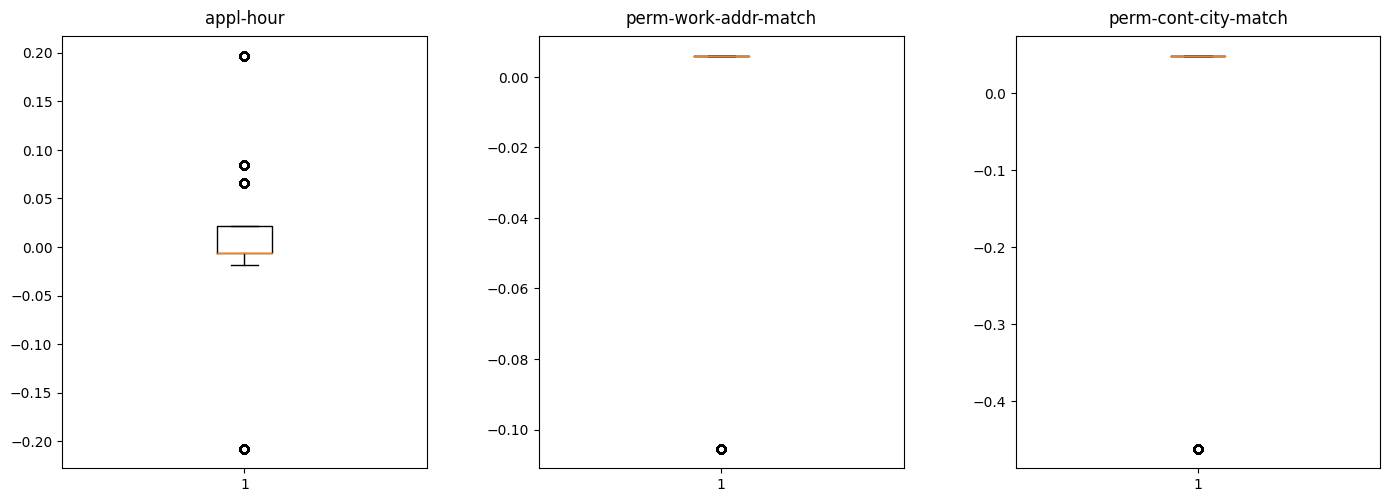

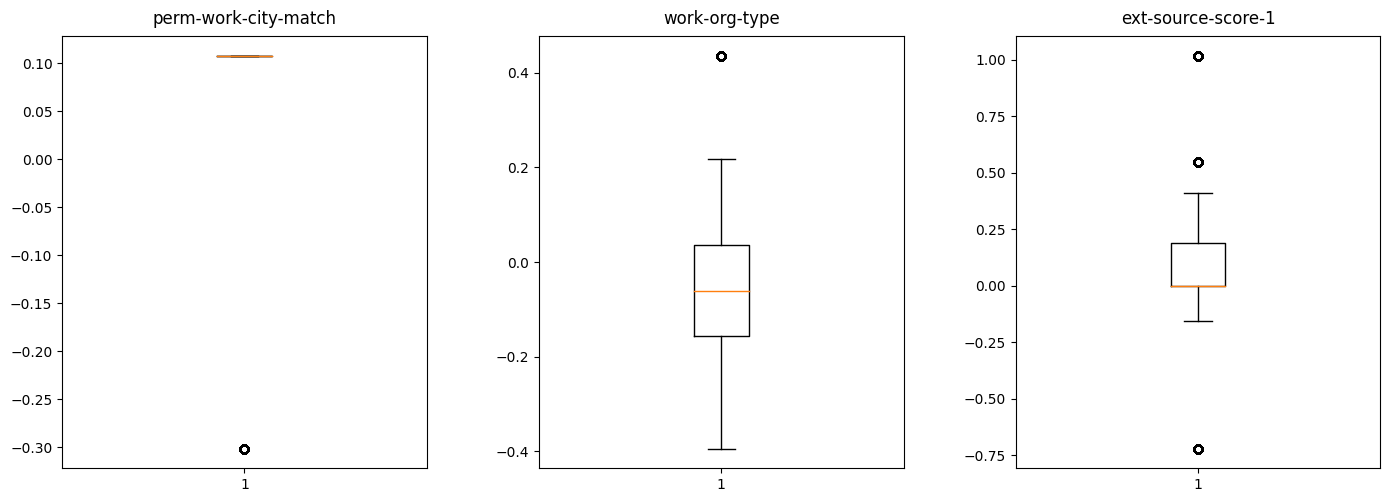

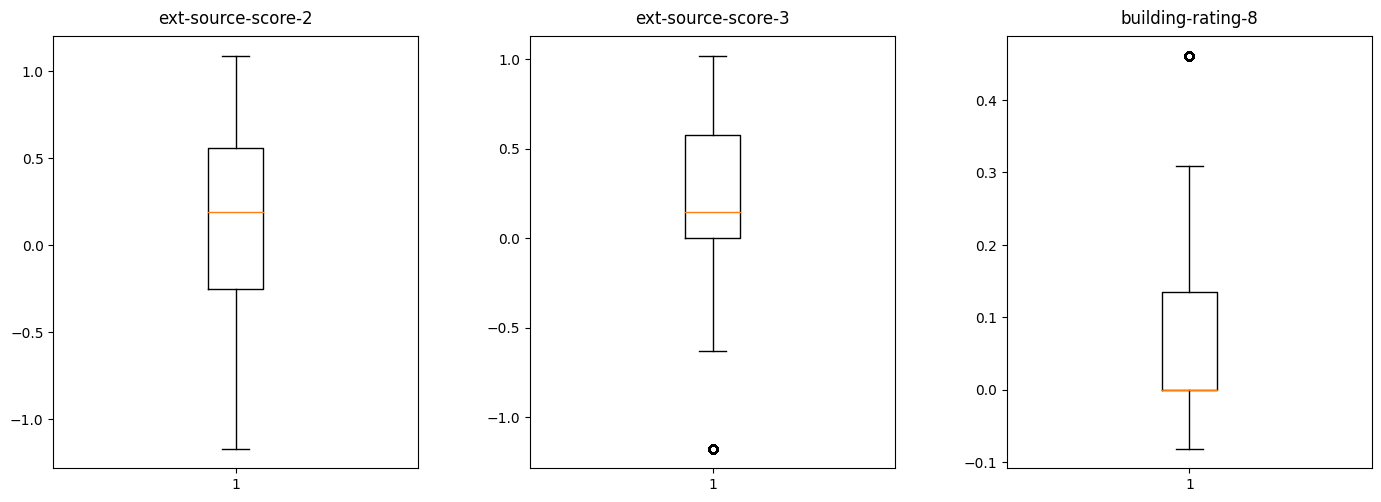

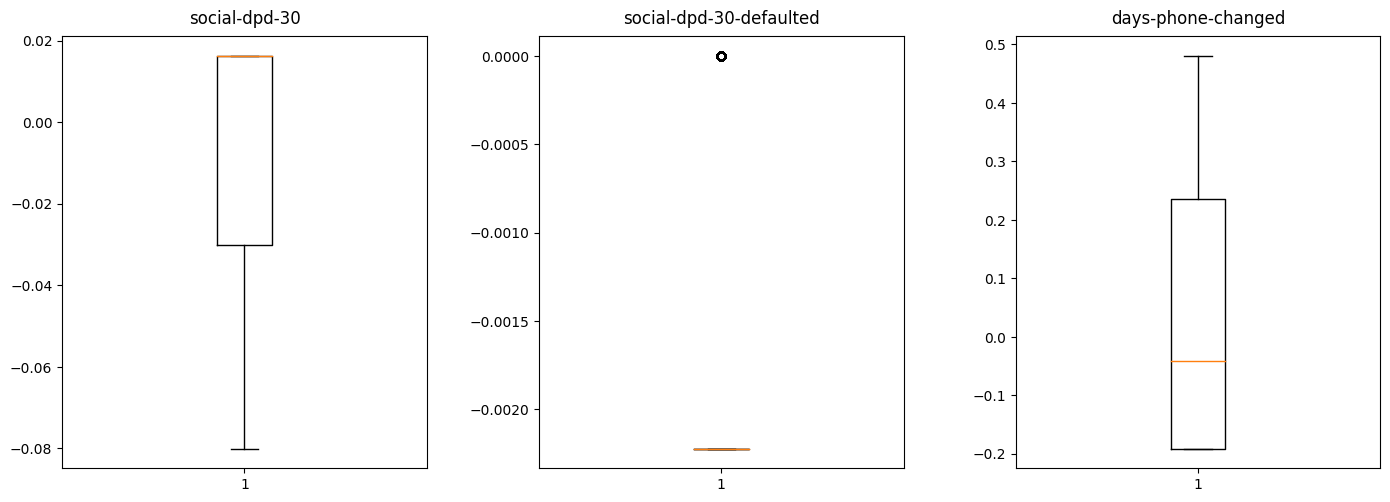

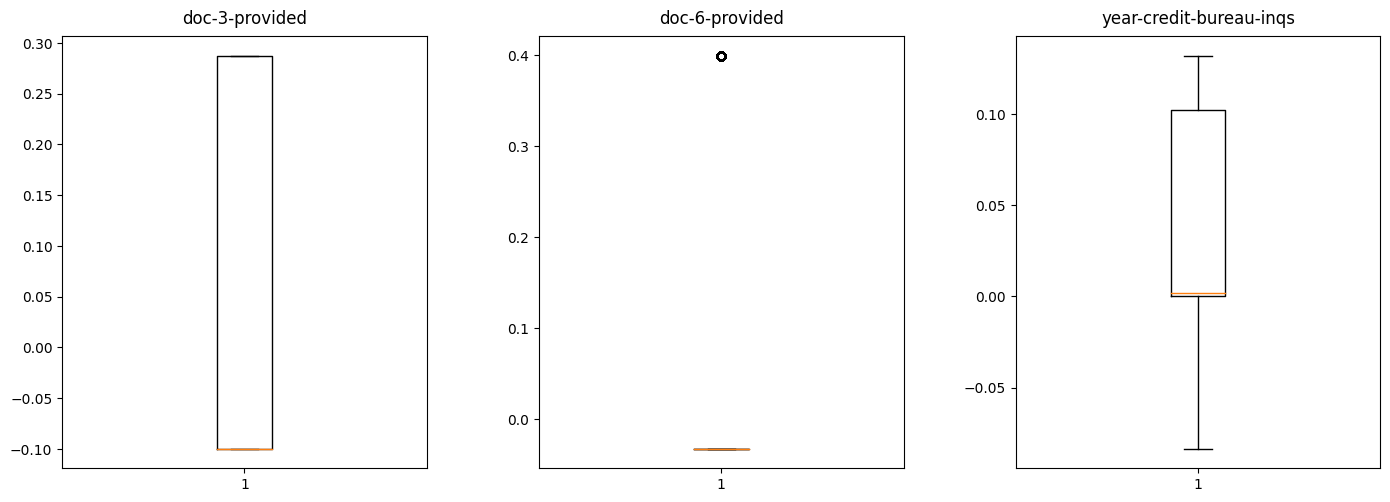

In [22]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=lc_prep_dataset_path)

In [23]:
#plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=lc_prep_dataset_path)

#### Plot samples count before and after Data cleaning.

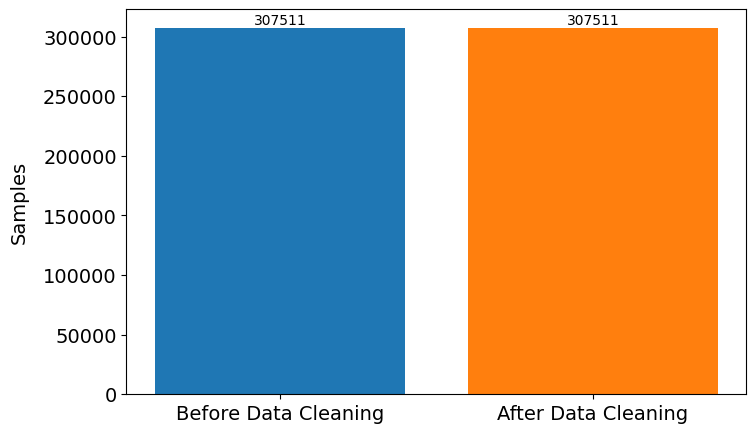

In [24]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=lc_prep_dataset_path + 'before_after.pdf')

#### Features IV scores

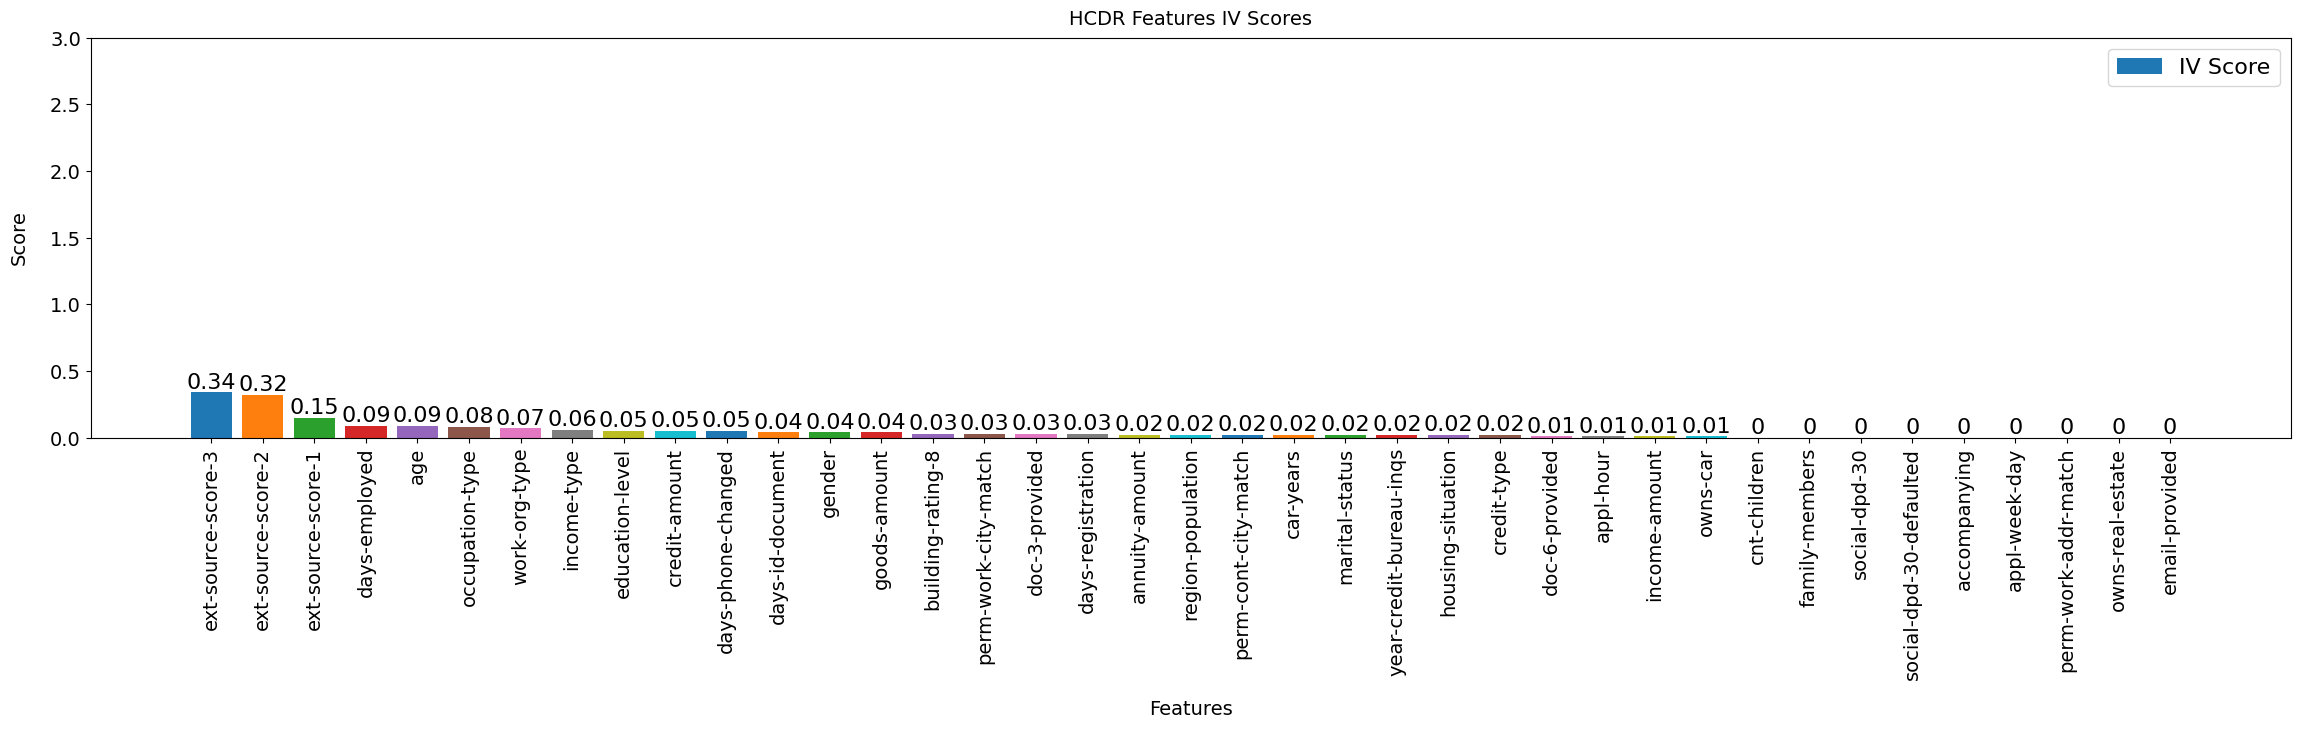

In [25]:
plotting.plot_features_scores(list(features_scores.keys()), list(features_scores.values()), 'LC Features IV Scores', figsize=(22, 4))

#### Features correlation

In [26]:
f_corr = preprocessing.features_correlation(data=data)

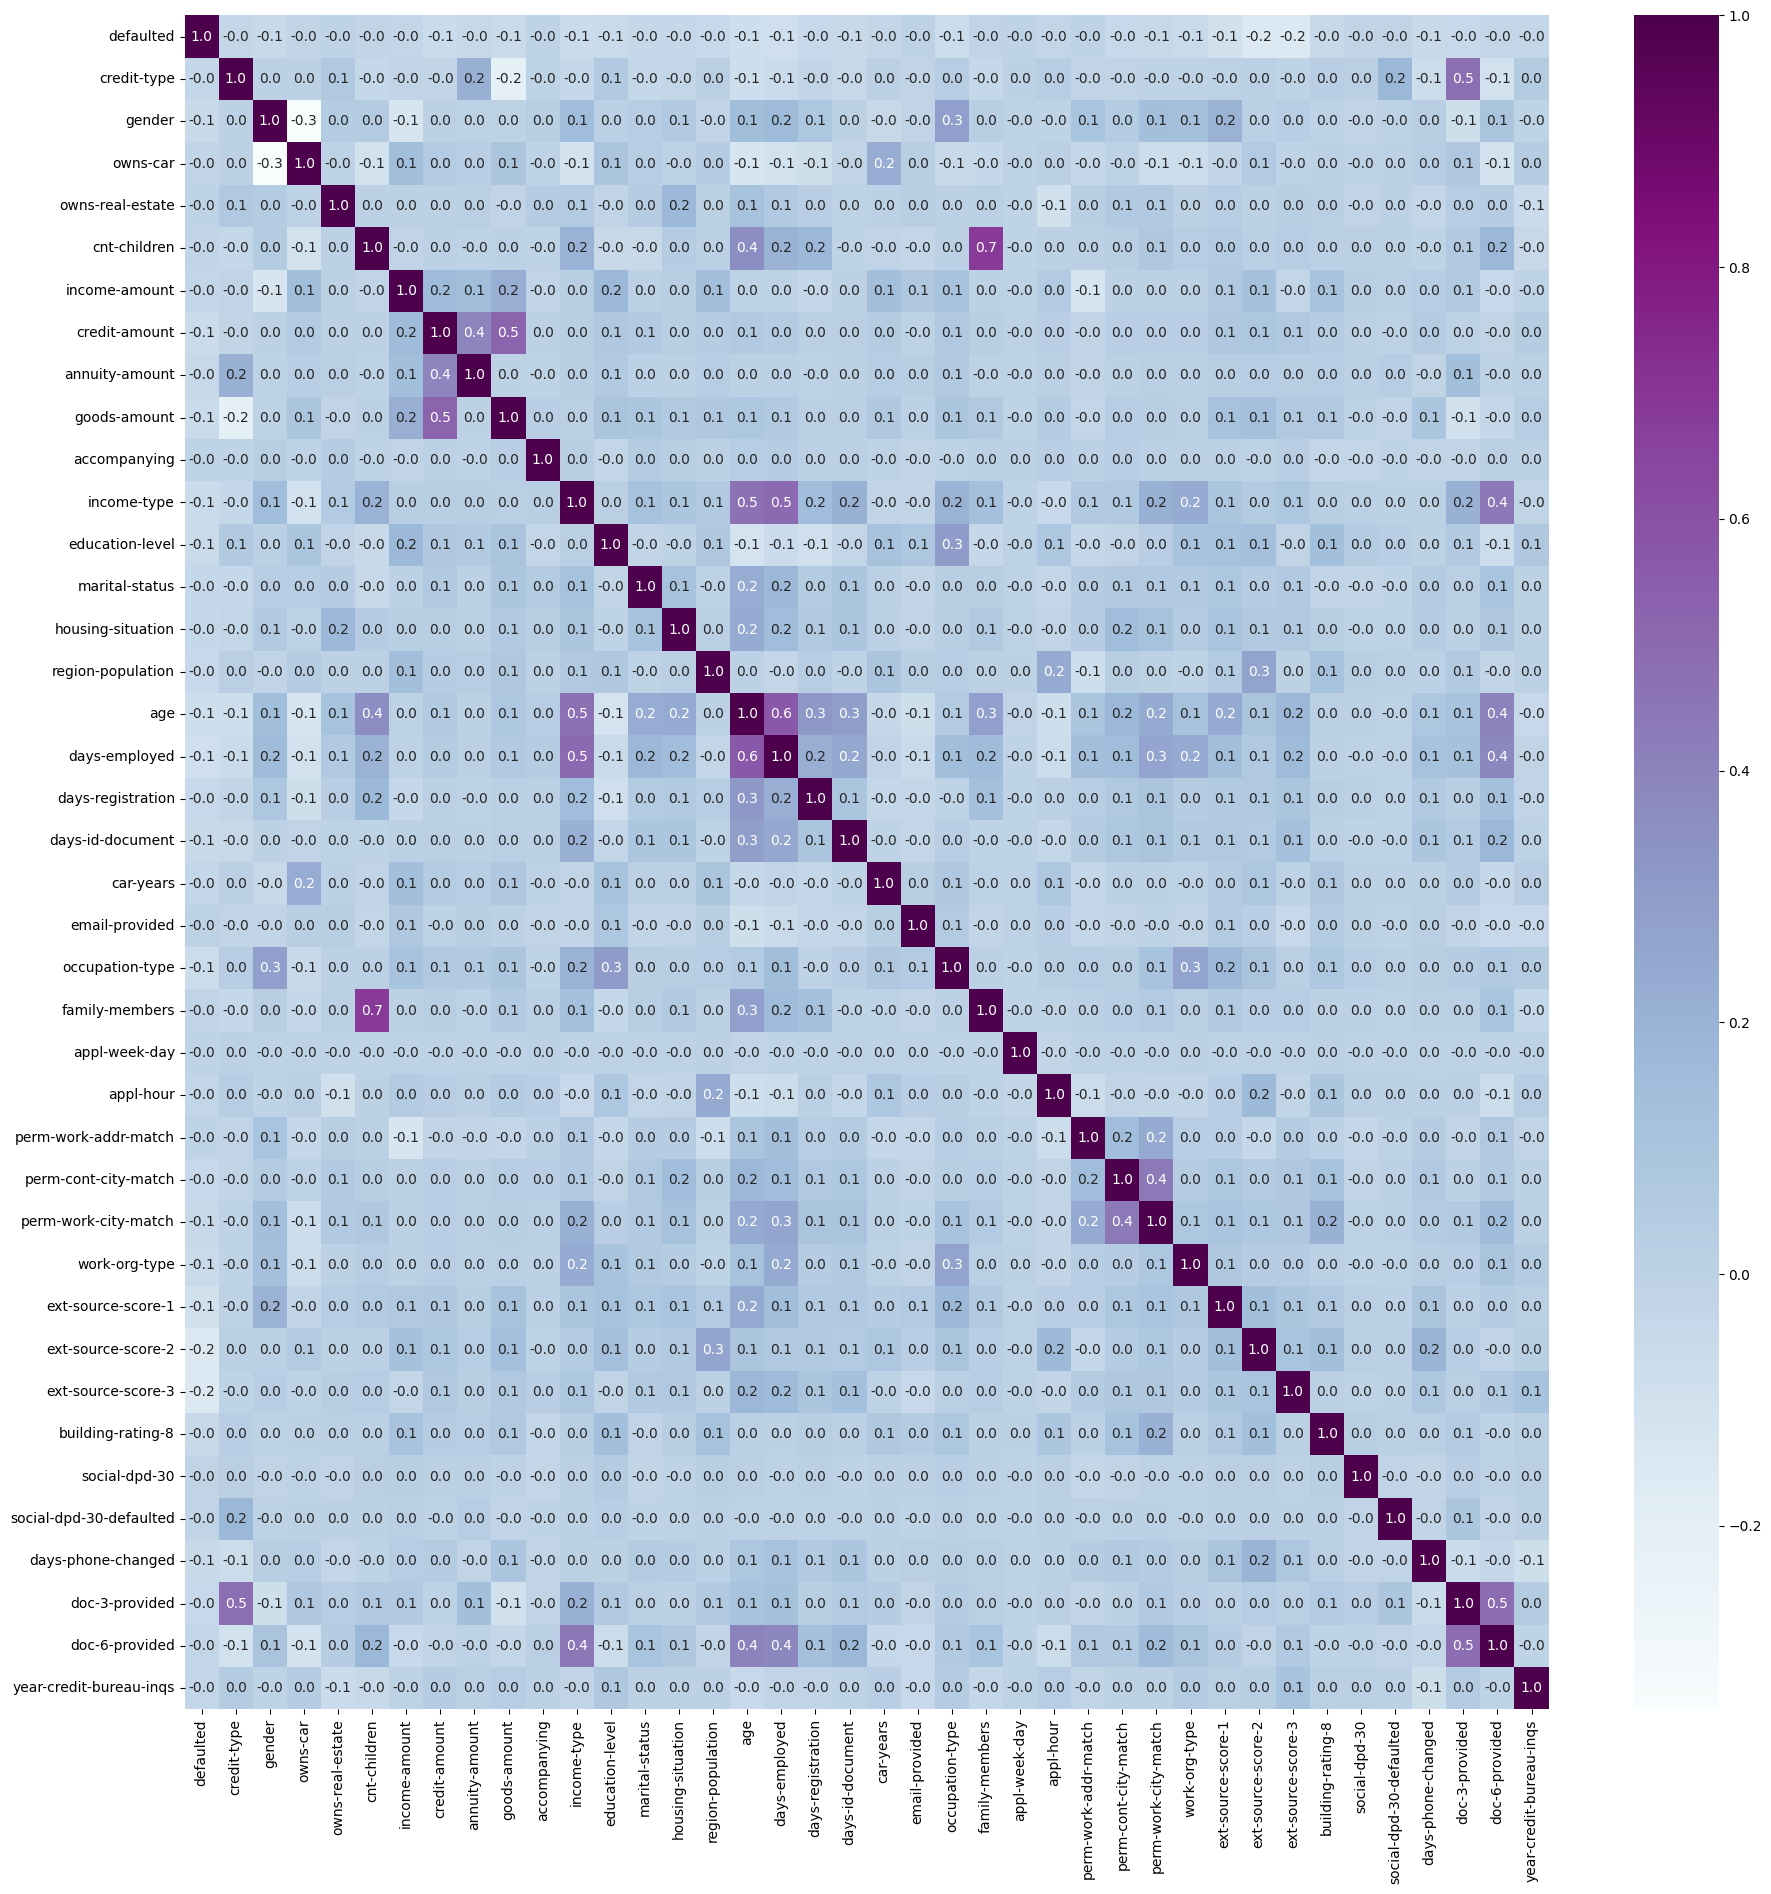

In [27]:
plotting.plot_heatmap(f_corr, figsize=(22, 22), save_path=lc_prep_dataset_path, dpi=100)

#### Drop redundant features using IV score.

In [28]:
data.drop(['family-members'], axis=1, inplace=True)

#### Save preprocessed dataset.

In [29]:
data

,defaulted,credit-type,gender,owns-car,owns-real-estate,cnt-children,income-amount,credit-amount,annuity-amount,goods-amount,...,ext-source-score-1,ext-source-score-2,ext-source-score-3,building-rating-8,social-dpd-30,social-dpd-30-defaulted,days-phone-changed,doc-3-provided,doc-6-provided,year-credit-bureau-inqs
0,True,-0.036236,-0.250931,-0.056242,0.015093,0.045934,0.022986,-0.388537,-0.115170,-0.143958,...,-0.721189,-0.384543,-1.176614,-0.081602,-0.030141,-0.002224,0.133897,-0.099767,-0.032188,0.102098
1,False,-0.036236,0.154307,-0.056242,-0.033490,0.045934,0.220444,0.425256,-0.041960,0.295792,...,-0.155311,0.371476,0.000000,0.308640,0.004764,-0.002224,-0.040824,-0.099767,-0.032188,0.131724
2,False,0.415543,-0.250931,0.117353,0.015093,0.045934,0.050490,0.327368,0.195039,-0.143958,...,0.000000,0.190548,0.913839,0.000000,0.016206,-0.002224,-0.040824,0.287143,-0.032188,0.131724
3,False,-0.036236,0.154307,-0.056242,0.015093,0.045934,-0.045439,-0.166937,-0.115170,-0.143958,...,0.000000,0.425190,0.000000,0.000000,-0.030141,-0.002224,-0.140862,-0.099767,-0.032188,0.000000
4,False,-0.036236,-0.250931,-0.056242,0.015093,0.045934,-0.079052,-0.207574,-0.070074,0.074176,...,0.000000,-0.384543,0.000000,0.000000,0.016206,-0.002224,0.015677,0.287143,-0.032188,0.131724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,-0.036236,-0.250931,-0.056242,-0.033490,0.045934,-0.045439,0.060453,-0.115170,-0.143958,...,-0.721189,0.630759,0.000000,0.460931,0.016206,-0.002224,-0.191406,0.287143,-0.032188,0.000000
307507,False,-0.036236,0.154307,-0.056242,0.015093,0.045934,0.050490,0.060453,0.195039,-0.143958,...,0.000000,-1.169118,0.000000,-0.081602,0.016206,-0.002224,-0.191406,-0.099767,-0.032188,0.000000
307508,False,-0.036236,0.154307,-0.056242,0.015093,0.045934,-0.045439,0.081030,-0.354649,0.074176,...,1.016443,0.050367,-0.629744,0.135167,-0.080059,-0.002224,0.291179,-0.099767,-0.032188,0.102098
307509,True,-0.036236,0.154307,-0.056242,0.015093,0.045934,-0.024923,-0.222612,-0.070074,-0.143958,...,0.000000,0.050367,0.691855,-0.081602,0.016206,-0.002224,-0.191406,-0.099767,-0.032188,0.131724


In [30]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   defaulted                307511 non-null  bool   
 1   credit-type              307511 non-null  float64
 2   gender                   307511 non-null  float64
 3   owns-car                 307511 non-null  float64
 4   owns-real-estate         307511 non-null  float64
 5   cnt-children             307511 non-null  float64
 6   income-amount            307511 non-null  float64
 7   credit-amount            307511 non-null  float64
 8   annuity-amount           307511 non-null  float64
 9   goods-amount             307511 non-null  float64
 10  accompanying             307511 non-null  float64
 11  income-type              307511 non-null  float64
 12  education-level          307511 non-null  float64
 13  marital-status           307511 non-null  float64
 14  hous

**EMP-$p_1$:**

In [31]:
len(data[data['defaulted'] == True])/len(data)

0.08072881945686496

**EMP-$p_0$:**

In [32]:
len(data[data['defaulted'] == False])/len(data)

0.9192711805431351

In [33]:
utilities.save_dataset(data=data, features_scores=features_scores, test_size=0.2,
                       save_path=lc_prep_dataset_path)

Train split size: 246008
Test split size: 61503
